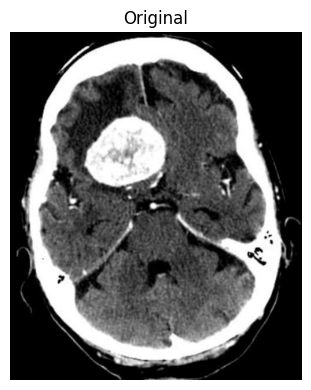

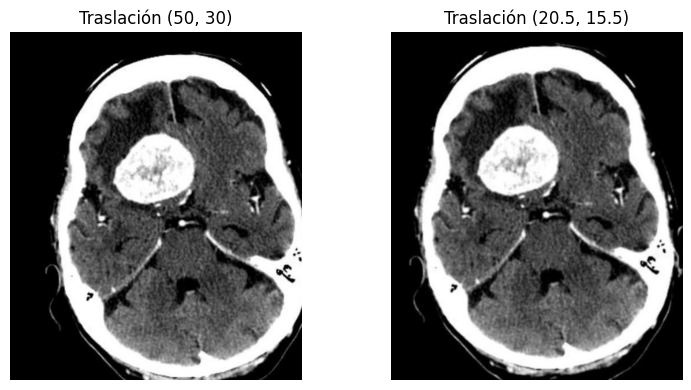

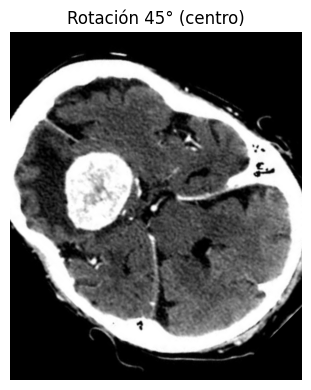

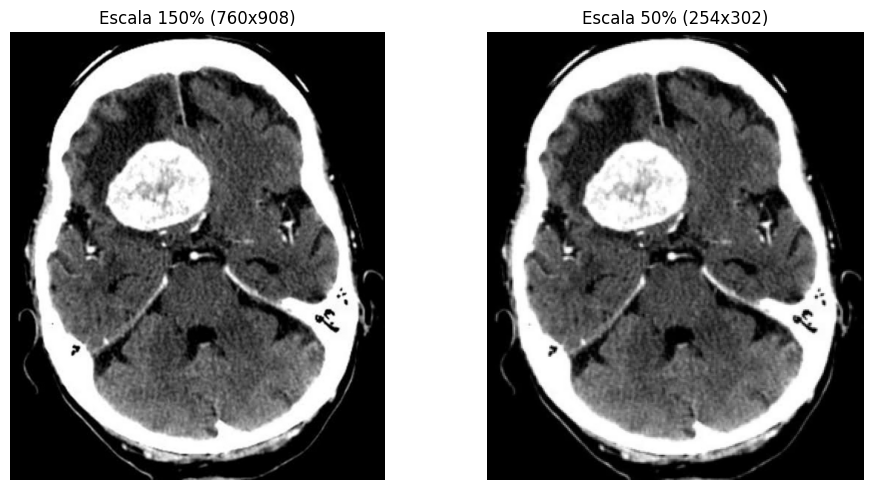

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen médica en escala de grises
ruta = 'Te-me_0015.jpg'
imagen = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

def mostrar(titulos, imagenes, filas_grid=1, cols_grid=None, cmap='gray'):
    if cols_grid is None:
        cols_grid = len(imagenes)
    plt.figure(figsize=(4*cols_grid, 4*filas_grid))
    for i, (t, im) in enumerate(zip(titulos, imagenes), 1):
        plt.subplot(filas_grid, cols_grid, i)
        plt.imshow(im, cmap=cmap, vmin=0, vmax=255)
        plt.title(t); plt.axis('off')
    plt.tight_layout(); plt.show()

# Mostrar original
mostrar(["Original"], [imagen])

# 1) Traslación (50, 30) píxeles en dirección (x, y)
M_t1 = np.float32([[1, 0, 50],
                   [0, 1, 30]])
trans_50_30 = cv2.warpAffine(
    imagen, M_t1, (columnas, filas),
    flags=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT, borderValue=0
)

# 2) Traslación con decimales (20.5, 15.5)
M_t2 = np.float32([[1, 0, 20.5],
                   [0, 1, 15.5]])
trans_dec = cv2.warpAffine(
    imagen, M_t2, (columnas, filas),
    flags=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT, borderValue=0
)

mostrar(
    ["Traslación (50, 30)", "Traslación (20.5, 15.5)"],
    [trans_50_30, trans_dec]
)

# Rotar 45° alrededor del centro de la imagen (sin cambio de tamaño)
centro = (columnas/2.0, filas/2.0)
M_r = cv2.getRotationMatrix2D(centro, 45, 1.0)
rotada_45 = cv2.warpAffine(
    imagen, M_r, (columnas, filas),
    flags=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT, borderValue=0
)
mostrar(["Rotación 45° (centro)"], [rotada_45])

# Escalar al 150% y 50%
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(esc_150, cmap='gray')
plt.title(f'Escala 150% ({esc_150.shape[1]}x{esc_150.shape[0]})')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(esc_50, cmap='gray')
plt.title(f'Escala 50% ({esc_50.shape[1]}x{esc_50.shape[0]})')
plt.axis('off')

plt.tight_layout()
plt.show()

